In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Banking.csv')
print(df.head())


  Client ID             Name  Age  Location ID Joined Bank   Banking Contact  \
0  IND81288    Raymond Mills   24        34324    5/6/2019    Anthony Torres   
1  IND65833    Julia Spencer   23        42205  12/10/2001  Jonathan Hawkins   
2  IND47499   Stephen Murray   27         7314   1/25/2010     Anthony Berry   
3  IND72498   Virginia Garza   40        34594   3/28/2019        Steve Diaz   
4  IND60181  Melissa Sanders   46        41269   7/20/2012        Shawn Long   

  Nationality            Occupation Fee Structure Loyalty Classification  ...  \
0    American  Safety Technician IV          High                   Jade  ...   
1     African   Software Consultant          High                   Jade  ...   
2    European    Help Desk Operator          High                   Gold  ...   
3    American          Geologist II           Mid                 Silver  ...   
4    American   Assistant Professor           Mid               Platinum  ...   

   Bank Deposits  Checking Accou

In [36]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64

Text(0.5, 1.0, 'Distribution of Income Bands')

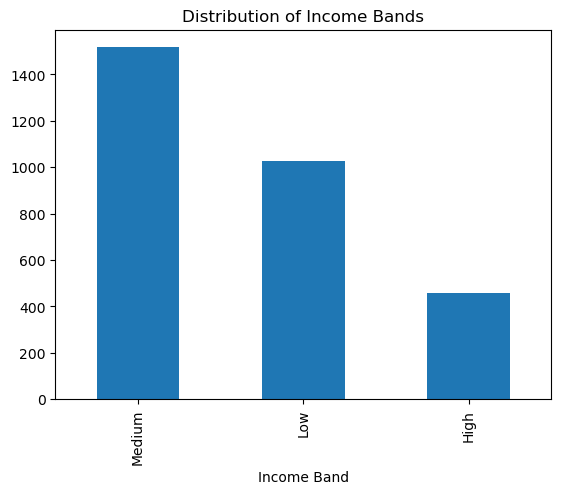

In [101]:
bins = [0, 100000, 300000, float ('inf')]
labels = ['Low', 'Medium', 'High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)
df["Income Band"].value_counts().plot(kind='bar')
plt.title('Distribution of Income Bands')

In [16]:
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(), "\n")

Value counts for BRId:
BRId
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64 

Value counts for GenderId:
GenderId
Female    1512
Male      1488
Name: count, dtype: int64 

Value counts for IAId:
IAId
Victor Dean          177
Ernest Knight        177
Eric Shaw            177
Joe Carroll          177
Jeremy Porter        177
Peter Castillo       176
Nicholas Ward        176
Carl Anderson        176
Daniel Carroll       176
Victor Gutierrez     176
Lawrence Sanchez     176
Steve Sanchez        176
Eugene Cunningham     89
Victor Rogers         89
Kevin Kim             89
Fred Bryant           88
Ryan Taylor           88
Sean Vasquez          88
Nicholas Morrison     88
Jack Phillips         88
Juan Ramirez          88
Gregory Boyd          88
Name: count, dtype: int64 

Value counts for Amount of Credit Cards:
Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64 

Value counts for Nationality:
Nati

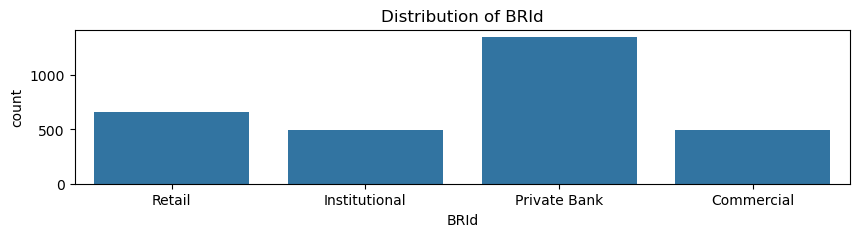

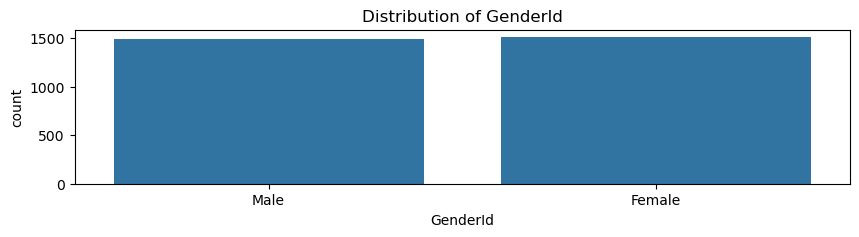

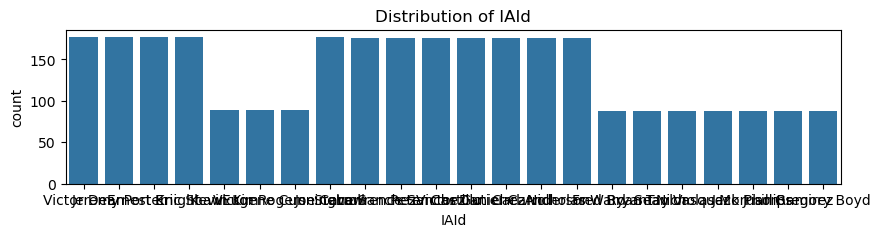

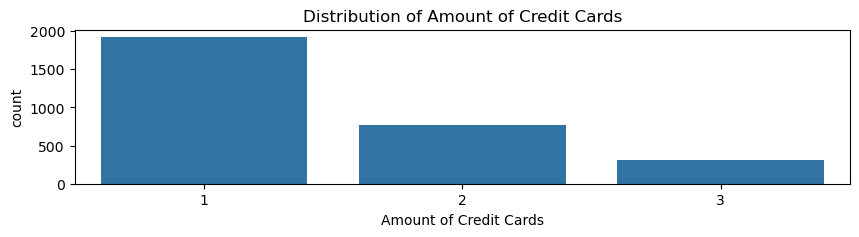

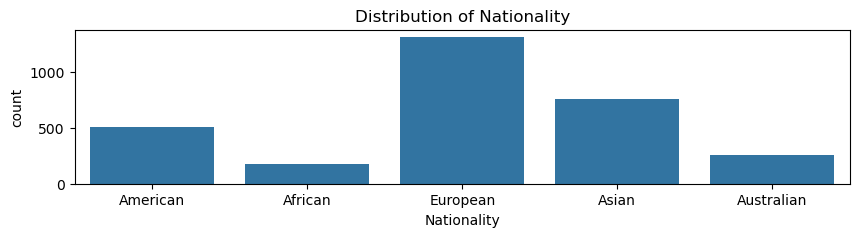

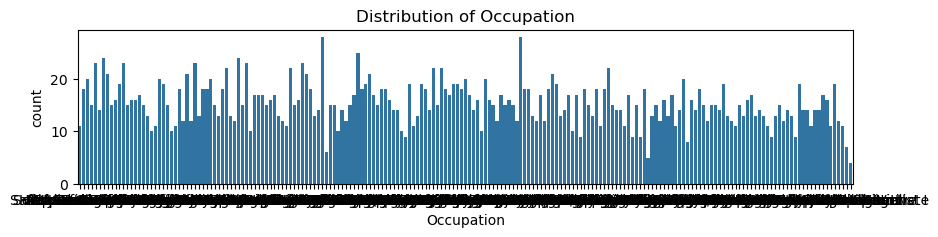

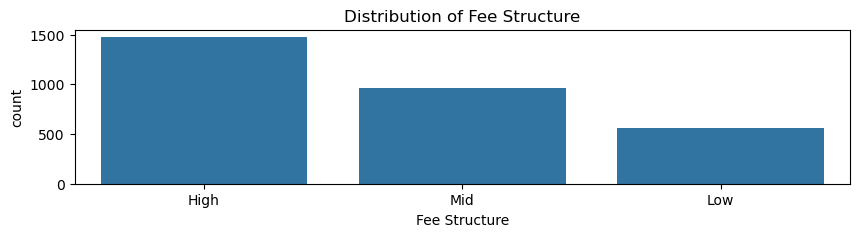

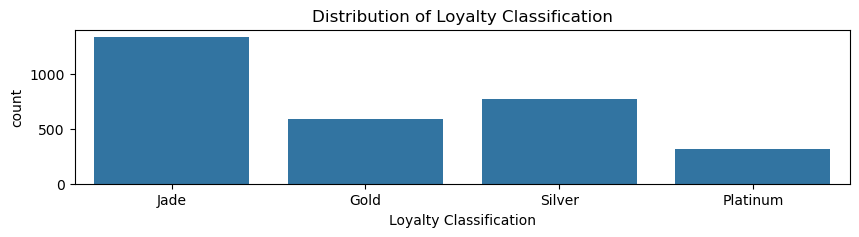

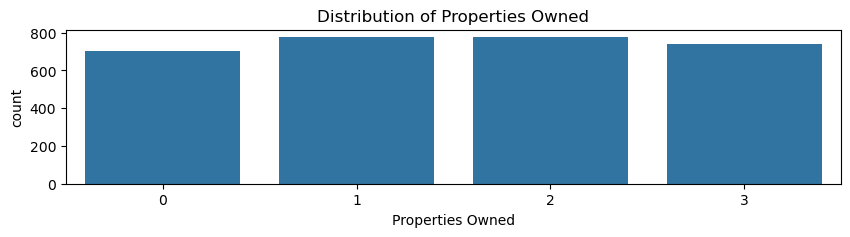

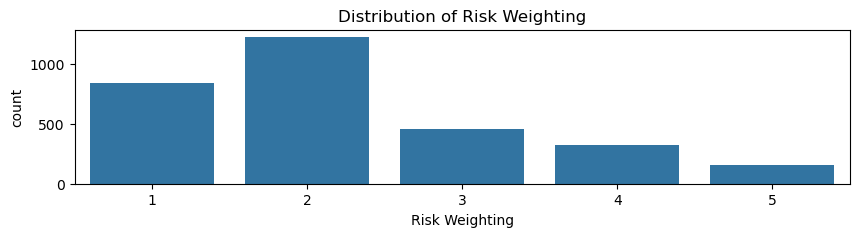

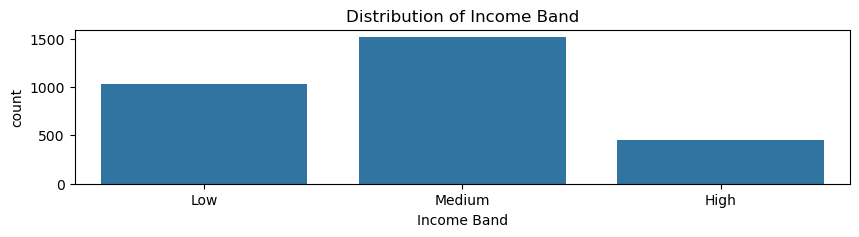

In [35]:
categorical_cols = [
    "BRId", "GenderId", "IAId", "Amount of Credit Cards",
    "Nationality", "Occupation", "Fee Structure",
    "Loyalty Classification", "Properties Owned",
    "Risk Weighting", "Income Band"
]

for col in categorical_cols:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


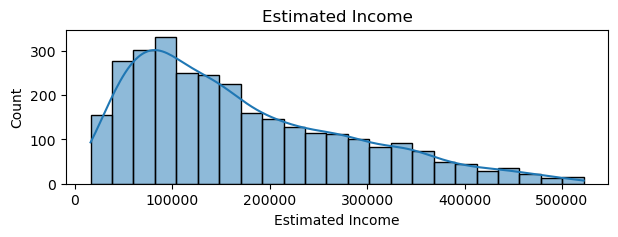

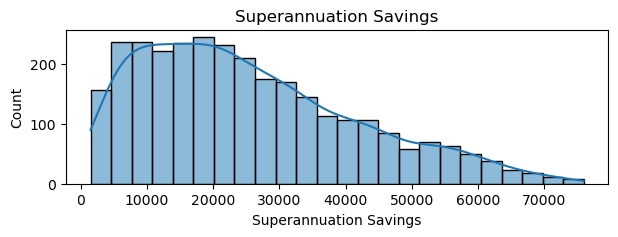

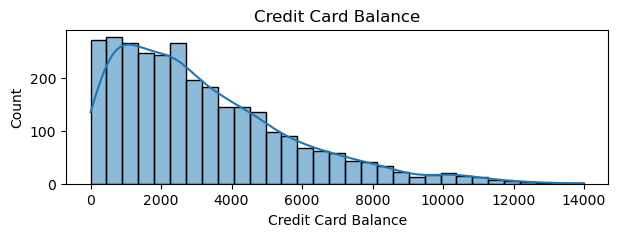

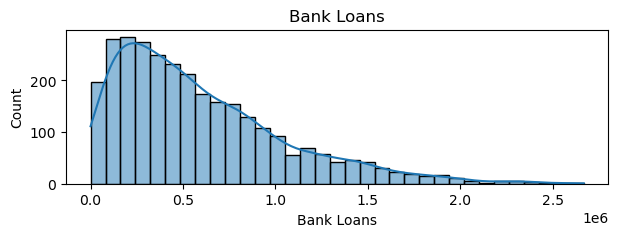

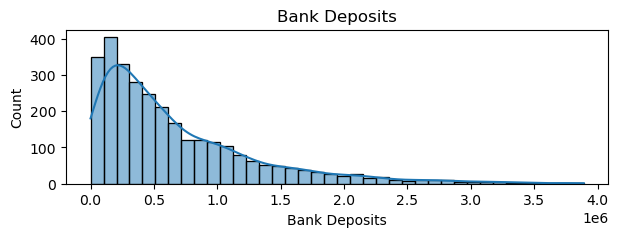

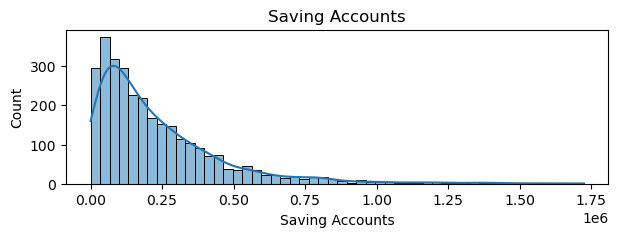

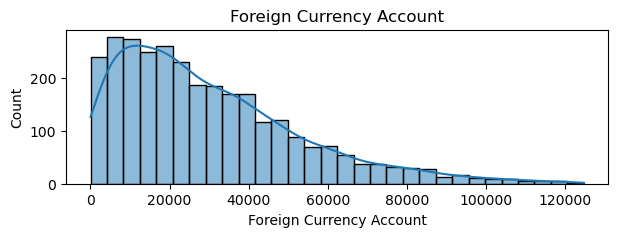

In [28]:
numerical_cols = ['Estimated Income', 'Superannuation Savings',
                  'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
                  'Saving Accounts',
                  'Foreign Currency Account']
for col in numerical_cols:
    plt.figure(figsize= (7,2))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


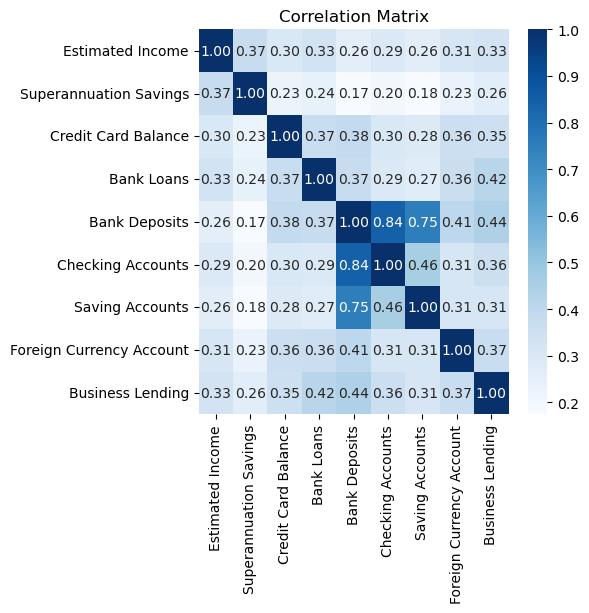

In [33]:
numerical_cols = ['Estimated Income', 'Superannuation Savings',
                  'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
                  'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

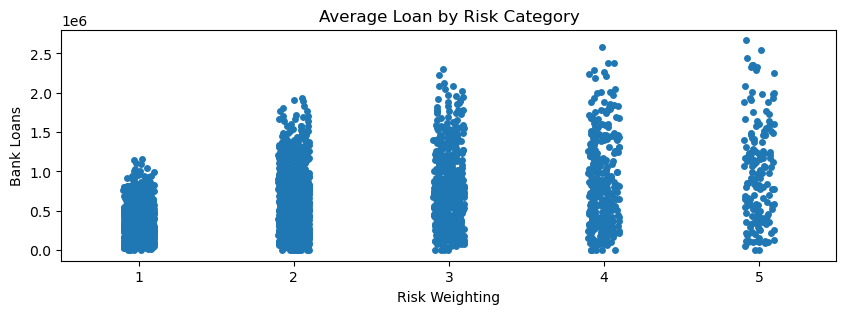

In [63]:
plt.figure(figsize=(10, 3))
sns.stripplot(x='Risk Weighting', y='Bank Loans', data=df)
plt.title("Average Loan by Risk Category")
plt.show()


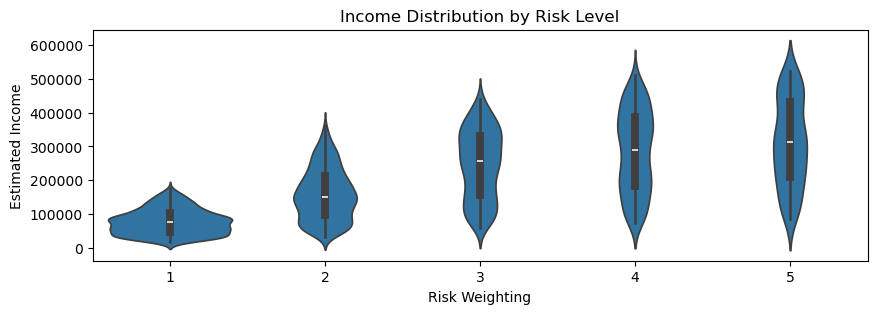

In [57]:
plt.figure(figsize=(10, 3))
sns.violinplot(x='Risk Weighting', y='Estimated Income', data=df)
plt.title("Income Distribution by Risk Level")
plt.show()


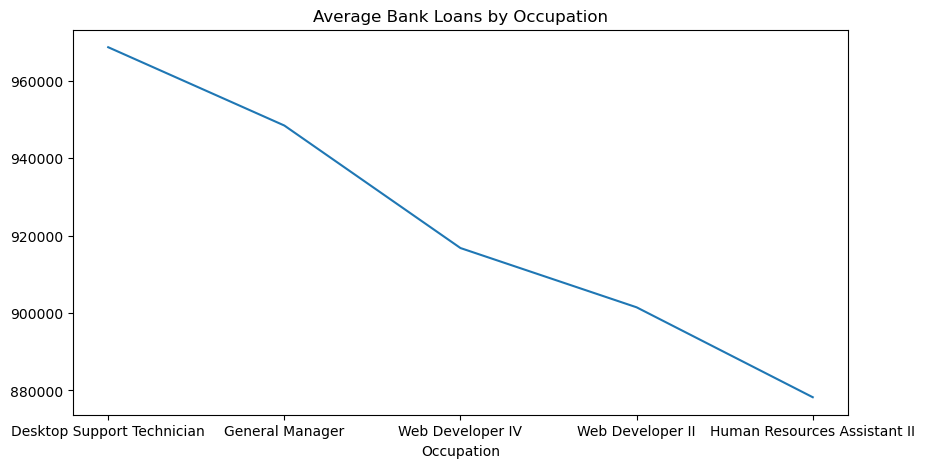

In [99]:
occ= df.groupby('Occupation')['Bank Loans'].mean().round(2).sort_values(ascending=False).head(5)
#print(occ)
plt.figure(figsize=(10,5))
sns.lineplot(x=occ.index, y=occ.values)
plt.title("Average Bank Loans by Occupation")
plt.show()

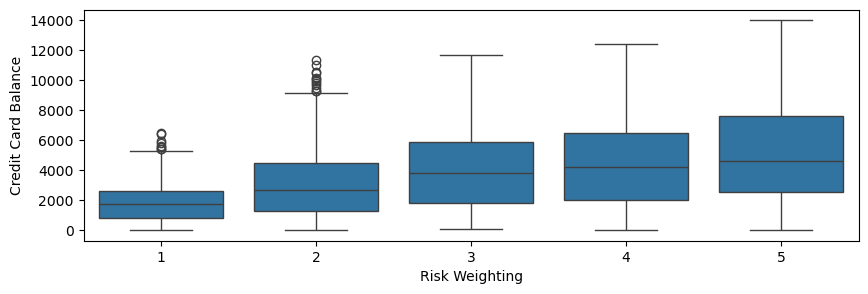

In [95]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='Risk Weighting', y='Credit Card Balance', data=df)
plt.show()


In [109]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')

In [105]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [106]:

import pandas as pd
from urllib.parse import quote_plus 
from sqlalchemy import create_engine
# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"           # default user
password = quote_plus("Eashan@12345")           # the password you set during installation
host = "localhost"              # if running locally
port = "5432"                   # default PostgreSQL port
database = "banking"  # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
# choose any table name
df.to_sql("customer", engine, if_exists="replace", index=False)

print("Data successfully loaded into table ")

Data successfully loaded into table 
